In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler

In [93]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [94]:
df.drop(['Gender'],axis=1,inplace=True)
df.drop(['CustomerID'],axis=1,inplace=True)
df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [95]:
df.dropna(inplace=True)
data = df.reset_index(drop=True)
data.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [96]:
df

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [97]:
df_scales= df[['Age','Annual Income (k$)','Spending Score (1-100)']]
scales = StandardScaler()

df_scales = scales.fit_transform(df_scales)
df_scales.shape

(200, 3)

In [98]:
len(df_scales)

200

In [99]:
data = pd.DataFrame(df_scales)
data.columns = df.columns

cluster_data = data.copy()
data.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


**K-MEANS**

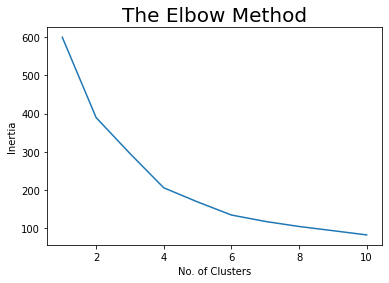

In [122]:
data_clusters = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(data)
    data_clusters.append(km.inertia_)

plt.plot(range(1, 11), data_clusters)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('Inertia')
plt.show()

In [101]:
model_kmeans3 = KMeans(n_clusters=3)
model_kmeans4 = KMeans(n_clusters=4)

# Train Model
model_kmeans3.fit(data)
model_kmeans4.fit(data)

# # Menambah Label pada data
cluster_data['cluster_kmeans3'] = model_kmeans3.labels_
cluster_data['cluster_kmeans4'] = model_kmeans4.labels_

cluster_data

,Age,Annual Income (k$),Spending Score (1-100),cluster_kmeans3,cluster_kmeans4
0,-1.424569,-1.738999,-0.434801,1,3
1,-1.281035,-1.738999,1.195704,1,3
2,-1.352802,-1.700830,-1.715913,1,3
3,-1.137502,-1.700830,1.040418,1,3
4,-0.563369,-1.662660,-0.395980,1,3
...,...,...,...,...,...
195,-0.276302,2.268791,1.118061,0,1
196,0.441365,2.497807,-0.861839,2,2
197,-0.491602,2.497807,0.923953,0,1
198,-0.491602,2.917671,-1.250054,0,2


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


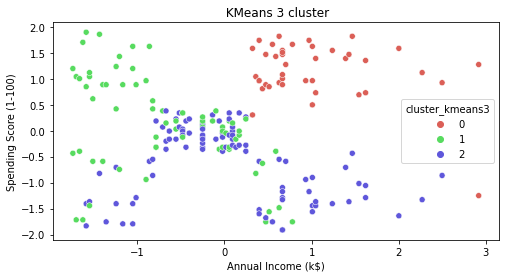

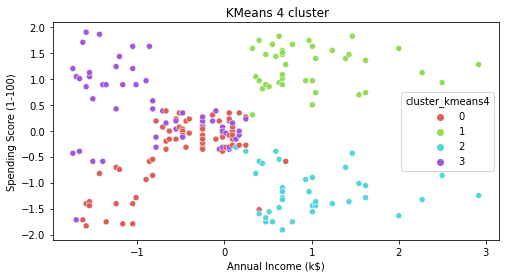

In [102]:
## Tampilkan Plot
plt.figure(figsize=(8, 4))
sns.scatterplot(cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'], hue=cluster_data['cluster_kmeans3'], palette=sns.color_palette('hls', 3))
plt.title(' KMeans 3 cluster')

plt.figure(figsize=(8, 4))
sns.scatterplot(cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'], hue=cluster_data['cluster_kmeans4'], palette=sns.color_palette('hls', 4))
plt.title(' KMeans 4 cluster')

plt.show()

In [105]:
pip install scikit-learn-extra

     |████████████████████████████████| 1.7 MB 14.1 MB/s 
     |████████████████████████████████| 22.3 MB 1.5 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [106]:
from sklearn_extra.cluster import KMedoids

**K-MEDOIDS**

In [107]:
model_kmedoids = KMedoids(n_clusters=4, random_state=0)
model_kmedoids.fit(data)

cluster_data['Cluster K-Medoids'] = model_kmedoids.labels_
cluster_data

,Age,Annual Income (k$),Spending Score (1-100),cluster_kmeans3,cluster_kmeans4,Cluster K-Medoids
0,-1.424569,-1.738999,-0.434801,1,3,1
1,-1.281035,-1.738999,1.195704,1,3,1
2,-1.352802,-1.700830,-1.715913,1,3,2
3,-1.137502,-1.700830,1.040418,1,3,1
4,-0.563369,-1.662660,-0.395980,1,3,0
...,...,...,...,...,...,...
195,-0.276302,2.268791,1.118061,0,1,1
196,0.441365,2.497807,-0.861839,2,2,3
197,-0.491602,2.497807,0.923953,0,1,1
198,-0.491602,2.917671,-1.250054,0,2,2


In [108]:
df.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


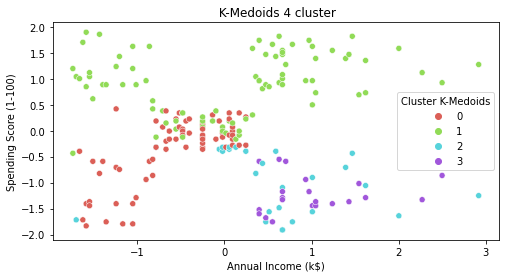

In [110]:
plt.figure(figsize=(8,4))
sns.scatterplot(cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'], hue=cluster_data['Cluster K-Medoids'], palette=sns.color_palette('hls',4))
plt.title(' K-Medoids 4 cluster')
plt.show()

**HIERARCY**

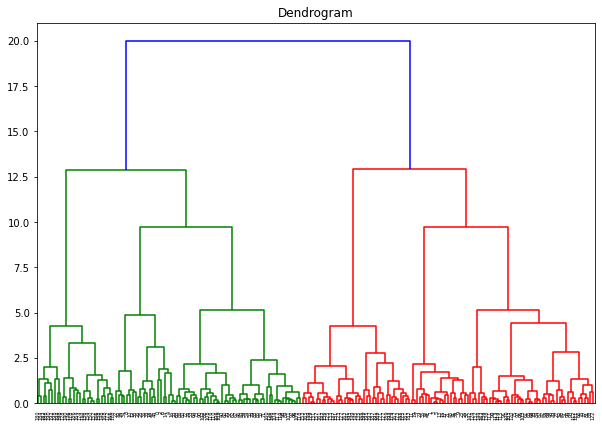

In [111]:
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize=(10,7))
plt.title("Dendrogram")
dend = dendrogram(linkage(data, method="ward"))
plt.axhline(y=35, color='r', linestyle='--')

Text(0.5, 1.0, 'Hierarchy')

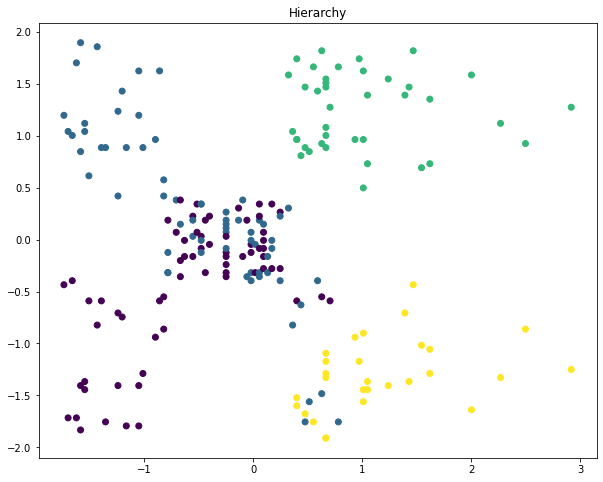

In [112]:
from sklearn.cluster import AgglomerativeClustering

model_agglo = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
model_agglo.fit_predict(data)

plt.figure(figsize=(10, 8))
plt.scatter(cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'], c=model_agglo.labels_)
plt.title('Hierarchy')

**DBSCAN**

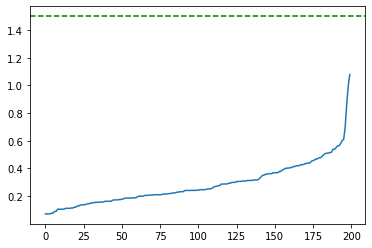

In [115]:
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=13)
nbrs = neigh.fit(data)
distances, indices = nbrs.kneighbors(data)

distances = np.sort(distances, axis=0)
distances = distances[:, 1]

plt.plot(distances)
plt.axhline(y=1.5, color='g', linestyle='--')

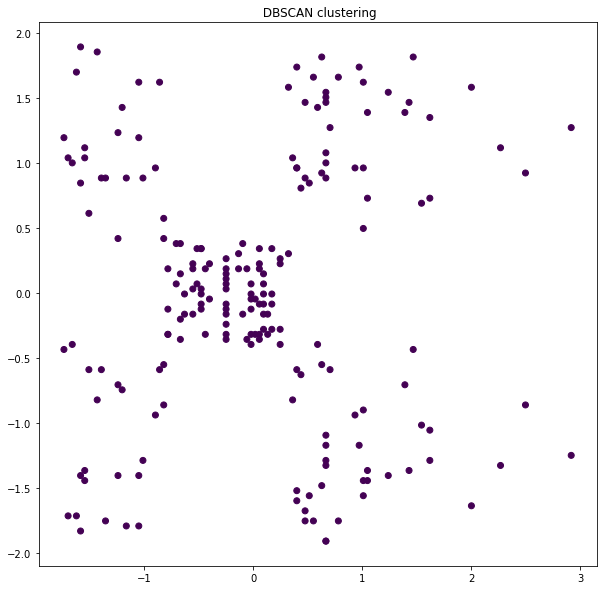

In [116]:

from sklearn.cluster import DBSCAN

model_dbscan = DBSCAN(eps=1.5, min_samples=13)
model_dbscan.fit(data)

plt.figure(figsize=(10,10))
plt.scatter(cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'], c=model_dbscan.labels_)
plt.title(' DBSCAN clustering')
plt.show()